In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)
import matplotlib.pyplot as plt
import progressbar
import scipy

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py,progressbar,scipy

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.19.0

pandas     : 1.2.0
keras      : 2.4.3
numpy      : 1.19.5
math       : unknown
tensorflow : 2.4.0
matplotlib : 3.3.3
h5py       : 2.10.0
progressbar: 2.5
scipy      : 1.6.0

Compiler    : GCC 5.4.0 20160609
OS          : Linux
Release     : 5.8.0-41-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

 
Last updated: Mon Feb 01 2021 11:57:54CET



## Load of the data

In [3]:
from process import loaddata
class_data = loaddata("../data/spec/raw_data_spec1.csv")

In [4]:
np.random.shuffle(class_data)
y = class_data[:,-3:]
x = class_data[:,:-3]

In [5]:
x.shape

(45276, 9)

In [6]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 33957 
Valuation sample: 11319


In [7]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers
from keras import regularizers

## !! 
The dropout 0.2 seems to work better

In [9]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (9, kernel_initializer= "normal" , input_shape = x.shape))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (64, activation = "relu"))
    model.add (layers.Dense (32, activation = "relu"))
    model.add (layers.Dense (12, activation = "relu"))
    model.add (layers.Dense (6, activation = "relu"))
    model.add (layers.Dense (3))
    model.compile(optimizer = "rmsprop" , loss = "mse" , metrics =["mae"])
    return model

In [10]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 50, validation_data = (x_val, y_val) )
model.save("../models/spec/firstNN.h5")

Epoch 1/20
680/680 [==============================] - 2s 2ms/step - loss: 14.8084 - mae: 2.3990 - val_loss: 0.2673 - val_mae: 0.3428
Epoch 2/20
680/680 [==============================] - 1s 1ms/step - loss: 0.4174 - mae: 0.4183 - val_loss: 0.2829 - val_mae: 0.3475
Epoch 3/20
680/680 [==============================] - 1s 1ms/step - loss: 0.2387 - mae: 0.3140 - val_loss: 0.0874 - val_mae: 0.1733
Epoch 4/20
680/680 [==============================] - 1s 1ms/step - loss: 0.1821 - mae: 0.2803 - val_loss: 0.2527 - val_mae: 0.3192
Epoch 5/20
680/680 [==============================] - 1s 1ms/step - loss: 0.1633 - mae: 0.2609 - val_loss: 0.1446 - val_mae: 0.2459
Epoch 6/20
680/680 [==============================] - 1s 1ms/step - loss: 0.1544 - mae: 0.2423 - val_loss: 0.0786 - val_mae: 0.1489
Epoch 7/20
680/680 [==============================] - 1s 1ms/step - loss: 0.1364 - mae: 0.2333 - val_loss: 0.1080 - val_mae: 0.1891
Epoch 8/20
680/680 [==============================] - 1s 1ms/step - loss: 0

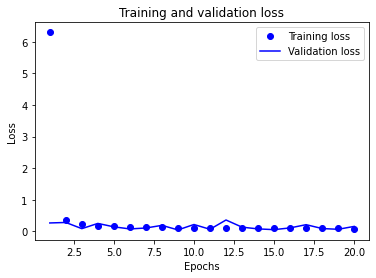

In [11]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Test spectrum

In [12]:
from tensorflow import keras
model = keras.models.load_model('../models/spec/firstNN.h5')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 45276, 9)          90        
_________________________________________________________________
dense_1 (Dense)              (None, 45276, 12)         120       
_________________________________________________________________
dense_2 (Dense)              (None, 45276, 32)         416       
_________________________________________________________________
dense_3 (Dense)              (None, 45276, 64)         2112      
_________________________________________________________________
dense_4 (Dense)              (None, 45276, 64)         4160      
_________________________________________________________________
dense_5 (Dense)              (None, 45276, 32)         2080      
_________________________________________________________________
dense_6 (Dense)              (None, 45276, 12)         3

In [14]:
def energy_spectrum(energy_array, bins):
    energy_array = np.array(energy_array)
    plt.hist(energy_array, bins, histtype=u'step', density=True)
    plt.yscale("log")
    plt.show()

In [15]:
y

array([[ -3.80704747,  -1.7480169 , -10.11085344],
       [ -1.29928374,   4.25973511,  -0.46097004],
       [  2.8847506 ,   1.88714278,  -2.37263083],
       ...,
       [ -2.13091731,  -7.9553051 ,  13.1400671 ],
       [  3.67218256,  -6.72098398,   8.02395439],
       [ -1.93304038,   8.51232815,   2.77844572]])

In [16]:
from tensorflow import keras 
photon_final_nn = []
prediction = model.predict(x)

[-3.5751977 -1.2383753  3.155716  ... -1.3059868  4.068448  -1.9534547]
[-3.80704747 -1.29928374  2.8847506  ... -2.13091731  3.67218256
 -1.93304038]


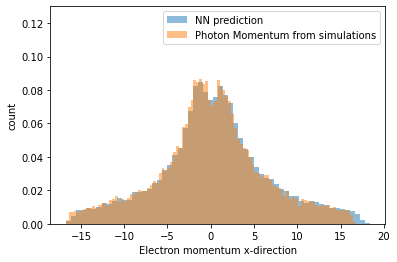

In [44]:
p1e_nn = prediction[:,0] 
p1e = y[:,0]
print(p1e_nn)
print(p1e)
plt.hist(p1e_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(p1e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum x-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 0.130))
plt.show()

[-1.4433975  4.2834415  2.1503303 ... -7.756457  -6.3902955  8.467965 ]
[-1.7480169   4.25973511  1.88714278 ... -7.9553051  -6.72098398
  8.51232815]


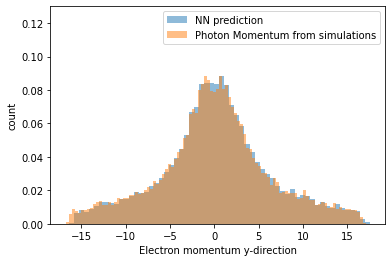

In [43]:
p2e_nn = prediction[:,1] 
p2e = y[:,1]
print(p2e_nn)
print(p2e)
plt.hist(p2e_nn, 60, alpha=0.5, label='NN prediction', density = True)
plt.hist(p2e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum y-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 0.130))
plt.show()

[-9.875181  -0.3786174 -2.23366   ... 13.5361     8.232476   2.9069839]
[-10.11085344  -0.46097004  -2.37263083 ...  13.1400671    8.02395439
   2.77844572]


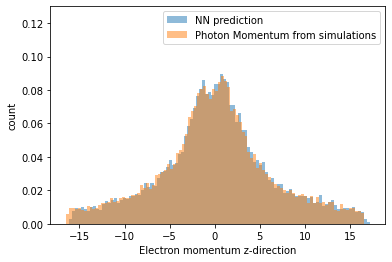

In [42]:
p3e_nn = prediction[:,2] 
p3e = y[:,2]
print(p3e_nn)
print(p3e)
plt.hist(p3e_nn, 100, alpha=0.5, label='NN prediction', density = True)
plt.hist(p3e, 100, alpha=0.5, label='Photon Momentum from simulations', density = True)
plt.xlabel('Electron momentum z-direction')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.ylim((0, 0.130))
plt.show()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


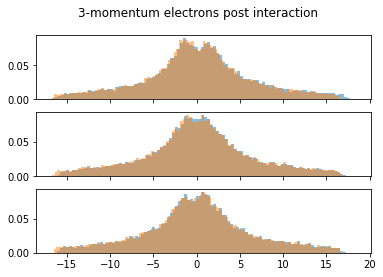

In [29]:
fig, axs = plt.subplots(3, sharex = True)
fig.suptitle('3-momentum electrons post interaction')
axs[0].hist(p1e_nn, 100, alpha=0.5, label='NN prediction', density = True)
axs[0].hist(p1e, 100, alpha=0.5, label='NN prediction', density = True)
axs[1].hist(p2e_nn, 100, alpha=0.5, label='Electron Momentum from simulations', density = True)
axs[1].hist(p2e, 100, alpha=0.5, label='Electron Momentum from simulations', density = True)
axs[2].hist(p3e_nn, 100, alpha=0.5, label='Electron Momentum from simulations', density = True)
axs[2].hist(p3e, 100, alpha=0.5, label='Electron Momentum from simulations', density = True)
fig.show()

In [30]:
final_e = []
for classi_ in class_data:
    final_e.append(np.linalg.norm(classi_[:-3]))

In [31]:
from tensorflow import keras 
final_e_nn = []
threshold = 0.5
num = int(1*len(x))
bar = progressbar.ProgressBar(maxval=num, 
                              widgets=[progressbar.Bar('=', '[', ']'), ' ', 
                                       progressbar.Percentage(), 
                                       " of {0}".format(num)])
bar.start()
for pred in prediction:
    final_e_nn.append(np.linalg.norm(pred))
bar.finish()

[===============================================================] 100% of 45276


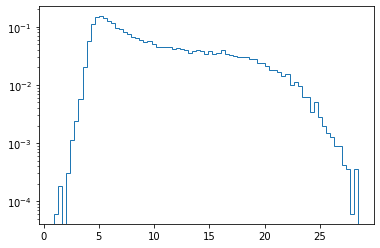

In [32]:
energy_spectrum(final_e, 75)

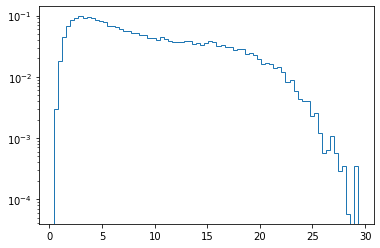

In [33]:
energy_spectrum(final_e_nn, 75)

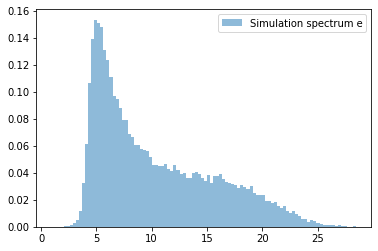

In [34]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean,std=norm.fit(final_e)
plt.hist(final_e, bins=100, alpha = 0.5, label='Simulation spectrum e', density = True)
plt.legend(loc='upper right')
plt.show()

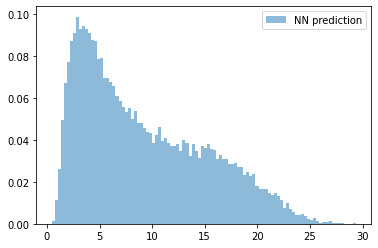

In [35]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chisquare

mean_nn,std_nn=norm.fit(final_e_nn)
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.legend(loc='upper right')
plt.show()

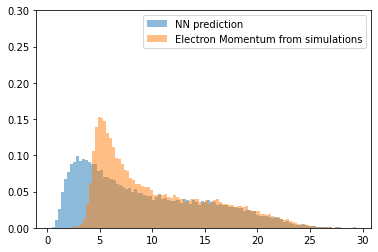

In [36]:
plt.hist(final_e_nn, bins=100, alpha = 0.5, label='NN prediction', density = True)
plt.hist(final_e, bins=100, alpha = 0.5, label='Electron Momentum from simulations', density = True)
plt.legend(loc = 'upper right')
plt.ylim((0, 0.30))
plt.show()